In [1]:
import stellar_wind as sw
import sigma_data as sd
import math 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reads the data from photons 
def read_data(theta_observer,phi_observer):
    #phi_observer=np.pi/2
    #theta_observer=np.pi/4
    #creat empty lists
    number_in_cone=0
    number_of_escaped=0
    number_of_absorbed=0
    number_of_scattered=0
    number_escaped_first=0
    v_observer=np.array([np.cos(phi_observer)*np.sin(theta_observer),np.sin(phi_observer)*np.sin(theta_observer),np.cos(phi_observer)])
    #print(v_observer)
    primary_energy = None
    last_index = None
    
    data = []
    status_of_photon=[]
    for line in open("data/tracking.txt"):
        line=line.strip()
        fields=line.split()
        
    
        if len(line)==0 or line[0]=='#':
            continue 
        counter = int(fields[0])
        energy = float(fields[1])
        status_of_photon.append(float(fields[13]))
        if counter != last_index:
            
            primary_energy =  energy
            last_index = counter
            if float(fields[13])==3.0:
                number_escaped_first+=1
        if float(fields[13])==2.0:
            number_of_absorbed+=1
        if float(fields[13])==1.0:
            number_of_scattered+=1
        if float(fields[13])==3.0:
            number_of_escaped+=1
            fields = [float(x) for x in fields]
        
            
            v=np.array([fields[5],fields[6],fields[7]])
            v /= sw.length(v)
#picking what we want theta and phi to be inbetween so that the photons are in the cone
            #print(v)
            test_in_cone=np.arccos(np.dot(v,v_observer) )
            #print(test_in_cone*180/np.pi)
            cone_angle=10
            
            
            if test_in_cone < cone_angle*np.pi/180 and test_in_cone > 0:
                number_in_cone+=1
             #calculating stokes paremters 
                weight=fields[12]
                
                
                z_hat=np.array([0,0,1] , dtype = float) #where the star is in the z direction
                pol_vector=np.array([fields[8],fields[9],fields[10]])
                pol_fraction=fields[11]
                x_tilde=np.cross(z_hat,v_observer)/sw.length(np.cross(z_hat,v_observer))
                y_tilde=np.cross(v_observer,x_tilde)/sw.length(np.cross(v_observer,x_tilde))
            
                psi_observer=np.arccos(np.dot(pol_vector,x_tilde)/(sw.length(pol_vector)*sw.length(x_tilde)))
                #print(np.dot(pol_vector,x_tilde)/(sw.length(pol_vector)*sw.length(x_tilde)))
                I_stoke=weight
                Q_stoke=weight*pol_fraction*np.cos(2*psi_observer)
                U_stoke=weight*pol_fraction*np.sin(2*psi_observer) 
                iqu=np.array([I_stoke,Q_stoke,U_stoke])
                data.append([counter,primary_energy,energy,v,weight,pol_vector,pol_fraction,psi_observer,I_stoke,Q_stoke,U_stoke,iqu]) 
                
                    #number_of_escaped,number_of_absorbed,number_of_scattered,stokesI,stokesU,stokesQ 
                    
    return  data,number_of_absorbed,number_of_scattered,number_of_escaped,number_escaped_first,status_of_photon,number_in_cone           
    
    

In [64]:
phi_observer = np.linspace(10*np.pi/180,2*np.pi-10*np.pi/180,18)
#phi_observer=np.pi/2
theta_observer = np.pi/4
pol_fraction=[] 
for phi_o in phi_observer:


    data,absorbed,scattered,escaped,number_escaped_first,status_of_photon,number_in_cone = read_data(theta_observer,phi_o)
#print(data)
#print(number_in_cone)
    #max_pol_fraction = 0.
#len(data)
    stokesI = 0.
    stokesQ = 0.
    stokesU = 0.
      

    for line in data:
    #print(len(line))
        stokesI += line[8]
        stokesQ += line[9]
        stokesU += line[10]
        #pol_fraction.append(line[6])
    pol_f=(np.sqrt(stokesQ**2+stokesU**2))/stokesI
    print('stokeI=',stokesI)
    print('stokeQ=',stokesQ)
    print('stokeU=',stokesU)
    pol_fraction.append(pol_f)

    

/Users/phionavall/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in arccos


stokeI= 6323.0
stokeQ= 1.3045547650202392e-29
stokeU= -6.221057162988057e-31
stokeI= 6843.0
stokeQ= 3.5489947706132434e-30
stokeU= -1.3921867323442847e-29


/Users/phionavall/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


stokeI= 0.0
stokeQ= 0.0
stokeU= 0.0
stokeI= 0.0
stokeQ= 0.0
stokeU= 0.0
stokeI= 0.0
stokeQ= 0.0
stokeU= 0.0
stokeI= 0.0
stokeQ= 0.0
stokeU= 0.0
stokeI= 0.0
stokeQ= 0.0
stokeU= 0.0
stokeI= 4884.0
stokeQ= -1.4767930382750978e-29
stokeU= 5.662030954951394e-29
stokeI= 4269.0
stokeQ= 9.703074222151656e-30
stokeU= 1.5309918184134606e-29
stokeI= 4471.0
stokeQ= -1.5462544647044219e-30
stokeU= 3.2360917375960166e-29
stokeI= 4921.0
stokeQ= 0.0
stokeU= 0.0
stokeI= 0.0
stokeQ= 0.0
stokeU= 0.0
stokeI= 0.0
stokeQ= 0.0
stokeU= 0.0
stokeI= 0.0
stokeQ= 0.0
stokeU= 0.0
stokeI= 0.0
stokeQ= 0.0
stokeU= 0.0
stokeI= 0.0
stokeQ= 0.0
stokeU= 0.0
stokeI= 6783.0
stokeQ= 3.9108841722072044e-29
stokeU= 6.978650270322423e-29
stokeI= 6223.0
stokeQ= 0.0
stokeU= 0.0


[0.17453293 0.52359878 0.87266463 1.22173048 1.57079633 1.91986218
 2.26892803 2.61799388 2.96705973 3.31612558 3.66519143 4.01425728
 4.36332313 4.71238898 5.06145483 5.41052068 5.75958653 6.10865238]
[2.0655341560177132e-33, 2.0995333414584248e-33, nan, nan, nan, nan, nan, 1.1980863748194407e-32, 4.2459034649800896e-33, 7.246217294743906e-33, 0.0, nan, nan, nan, nan, nan, 1.1793875733272287e-32, 0.0]
stokeI= 6223.0
0.017637593270225516


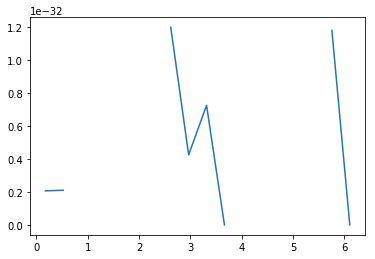

In [63]:
plt.plot(phi_observer,pol_fraction)
print((phi_observer))
print(pol_fraction)
print('stokeI=',stokesI)

print((1 -  (number_escaped_first/escaped))*100)


[[7.94112400e-30 7.93469330e-30 7.91541431e-30 ... 1.61475690e-29
  1.62018869e-29 1.62200239e-29]
 [7.94112400e-30 7.93470135e-30 7.91544649e-30 ... 1.61476313e-29
  1.62019025e-29 1.62200239e-29]
 [7.94112400e-30 7.93472546e-30 7.91554291e-30 ... 1.61478177e-29
  1.62019491e-29 1.62200239e-29]
 ...
 [7.94112400e-30 7.93472546e-30 7.91554291e-30 ... 1.61478177e-29
  1.62019491e-29 1.62200239e-29]
 [7.94112400e-30 7.93470135e-30 7.91544649e-30 ... 1.61476313e-29
  1.62019025e-29 1.62200239e-29]
 [7.94112400e-30 7.93469330e-30 7.91541431e-30 ... 1.61475690e-29
  1.62018869e-29 1.62200239e-29]]


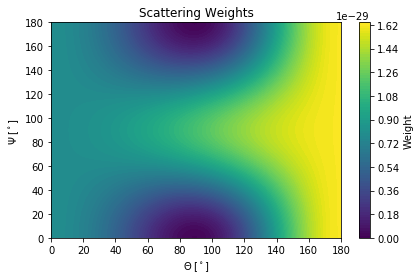

In [6]:
psi=np.linspace(0,math.pi,100)
theta=np.linspace(0,math.pi,100)
weight=1
energy=100E-3/.511
z=[]

for p in psi:
    l=[]
    for t in theta:
            
        epsilon_prime=sw.compton_formula(t,energy)
        I_stoke=weight
        Q_stoke=weight*np.cos(2*((np.pi/2)-p))
        U_stoke=weight*np.sin(2*((np.pi/2)-p))
        IQU=np.array([I_stoke,Q_stoke,U_stoke])
        i_prime=sw.fano(t,epsilon_prime,energy,IQU)[0]
        l.append(i_prime)
    z.append(l)
ls=np.array(1)*np.array(z)
print(ls)

cs=plt.contourf(psi*180/np.pi,theta*180/np.pi,z,levels=100)
plt.colorbar(cs,label='Weight')
plt.ylabel(r'$\Psi\;[^\circ]$')
plt.xlabel(r'$\Theta\;[^\circ]$')
plt.title('Scattering Weights')
plt.tight_layout()
plt.show()
    
            

In [ ]:
sigma = sd.interpolated_data(data,energy)

    #if line[6] > max_pol_fraction:
            #max_pol_fraction=line[6]
#print(max_pol_fraction)
#print(stokesU/stokesI)
#print(stokesQ/stokesI)
#print(scattered)
#print(escaped)
#print(number_escaped_first)
#scattered_fraction = 1 -  (number_escaped_first/escaped)
#print(scattered_fraction)
#plt.hist(scattered, 1, density=True)
#plt.hist(absorbed, 1, density=True)
#plt.hist(escaped, 1, density=True)

#plt.hist(status_of_photon, density=False)
#plt.hist(pol_fraction,10,density=True)


#plt.plot(phi_observer,pol_fraction)    



#fano(THETA,epsilon_prime,epsilon,IQU):


